<a href="https://colab.research.google.com/github/oussama-marhaoui/Machine-Learning/blob/K-Nearest-Neighbors/K_Nearest%20Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('knn.txt')
df

,attribut1,attribut2,classe
0,1,2,C1
1,2,6,C1
2,2,5,C2
3,2,1,C3
4,4,2,C5
5,5,6,C4
6,6,5,C3
7,6,1,C6


In [64]:
df1 = pd.read_csv('knn1.txt')
df1

,X1,X2,Y
0,2.0,2.0,0
1,3.0,5.0,0
2,4.0,6.0,0
3,4.0,3.0,1
4,5.0,2.0,1
5,5.0,1.0,1
6,7.0,3.0,1
7,6.0,4.0,1
8,5.0,5.0,0


In [27]:
X1 = df1.loc[:,'X1']
X2 = df1.loc[:,'X2']

In [20]:
x = df.loc[:,"attribut1"]
y = df.loc[:,"attribut2"]

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      9 non-null      float64
 1   X2      9 non-null      float64
 2   Y       9 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 344.0 bytes


In [29]:
df1.count()

X1    9
X2    9
Y     9
dtype: int64

In [30]:
df1.isna().sum()

X1    0
X2    0
Y     0
dtype: int64

In [34]:
df1['Y'].value_counts()

1    5
0    4
Name: Y, dtype: int64

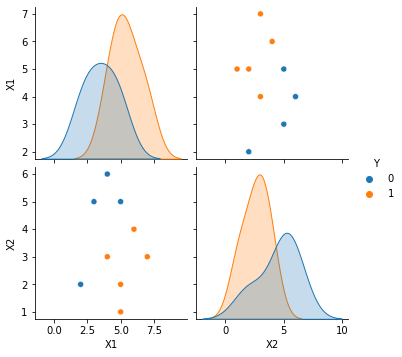

In [36]:
sns.pairplot(df1, hue='Y')

In [37]:
from numpy import sqrt as racine

In [38]:
def distance(x1, y1, x2, y2):
  return racine((x1-x2)**2 + (y1-y2)**2)

In [43]:
x_new, y_new = 4.0, 4.0
df1['dist'] = distance(df1['X1'], df1['X2'], x_new, y_new)
df1

,X1,X2,Y,dist
0,2.0,2.0,0,2.828427
1,3.0,5.0,0,1.414214
2,4.0,6.0,0,2.000000
3,4.0,3.0,1,1.000000
4,5.0,2.0,1,2.236068
5,5.0,1.0,1,3.162278
6,7.0,3.0,1,3.162278
7,6.0,4.0,1,2.000000
8,5.0,5.0,0,1.414214


In [44]:
x = df1.loc[:,"X1"]
y = df1.loc[:,"X2"]

In [45]:
df1 = df1.sort_values(by = 'dist')
print(df1.head())

    X1   X2  Y      dist
3  4.0  3.0  1  1.000000
1  3.0  5.0  0  1.414214
8  5.0  5.0  0  1.414214
2  4.0  6.0  0  2.000000
7  6.0  4.0  1  2.000000


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import sqrt as racine

fichier = "knn1.txt"
x_new, y_new = 4.0, 4.0

def distance(x1, y1, x2, y2):
    """ Fonction qui retourne la
    distance entre (x1; y1) et (x2; y2)"""
    return racine((x1-x2)**2 + (y1-y2)**2)

def k_plus_proches_voisins(fichier, x_new, y_new, k):
    """ Retourne le label a attribuer au nouveau"""
    df1 = pd.read_csv(fichier)
    df1['dist'] = distance(df1['X1'], df1['X2'], x_new, y_new)
    df1 = df1.sort_values(by = 'dist')
    s = df1.head(k)['Y'].value_counts()
    return s.idxmax()

print(k_plus_proches_voisins(fichier, x_new, y_new, 6))

1


## Standardize the Variables

In [57]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit(df1.drop('Y', axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
scaled_features = scaler.transform(df1.drop('Y', axis=1))

In [68]:
df1_feat = pd.DataFrame(scaled_features, columns=df1.columns[:-1]) 

In [69]:
df1_feat.head()

,X1,X2
0,-1.795998,-0.919239
1,-1.093216,0.989949
2,-0.390434,1.626346
3,-0.390434,-0.282843
4,0.312348,-0.919239


## Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
X = df1_feat
y = df1['Y']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)

# USING KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# **Predictions and Evaluations**

In [92]:
pred = knn.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [94]:
print(confusion_matrix(y_test, pred))

[[1 0]
 [0 1]]


In [95]:
print(accuracy_score(y_test, pred))

1.0


In [96]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# **Choosing a K Value**

In [87]:
df1.shape

(9, 3)

In [101]:
import numpy as np
error_rate = []
for i in range(1,8):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

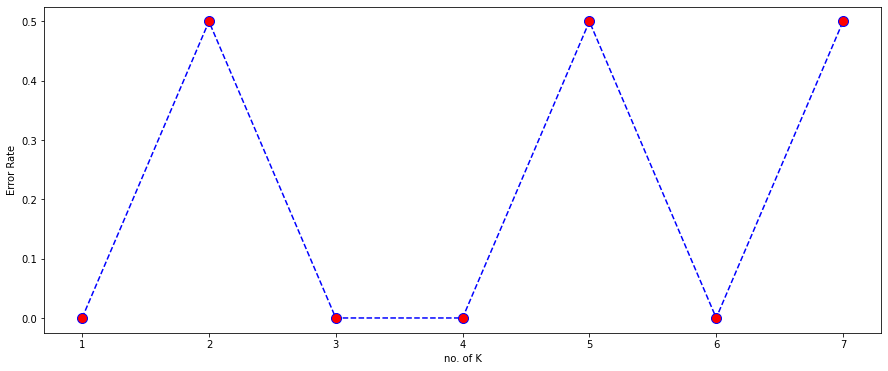

In [102]:
plt.figure(figsize=(15,6))
plt.plot(range(1,8),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

In [106]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[1 0]
 [0 1]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

